### Import libraries

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/AN2DL/polimi-an2dl/lec1

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/AN2DL/lec1'
/content


In [9]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [10]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.13.0


In [11]:
# Import other libraries
import matplotlib.pyplot as plt

### Define the Perceptron model

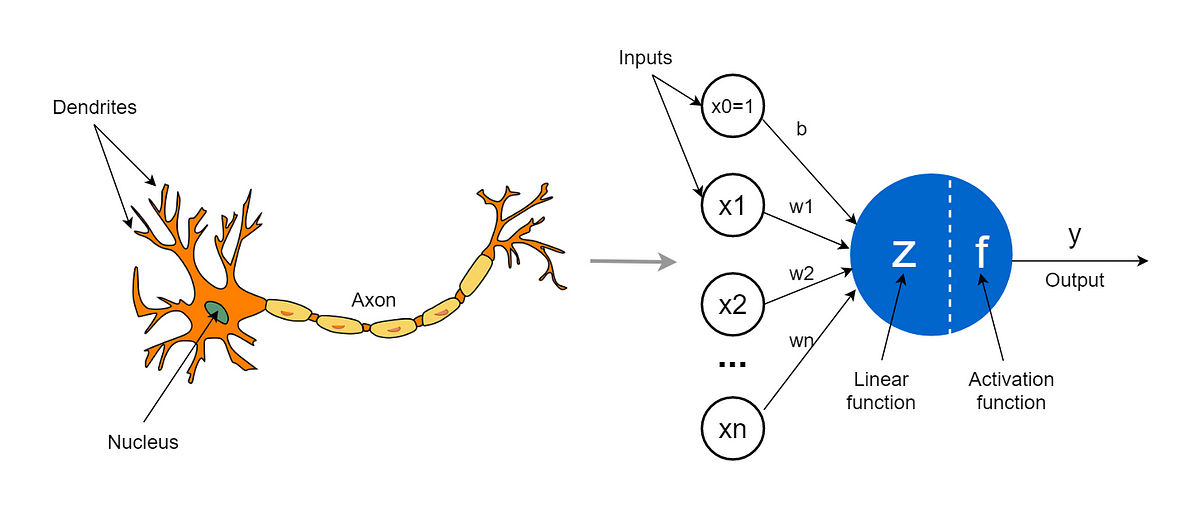

In [12]:
def build_perceptron(
    input_shape,
    seed=seed
):
    # Fix randomness
    tf.random.set_seed(seed)

    # Build the model
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    output_layer = tfkl.Dense(units=1, name='Output')(input_layer)
    output_activation = tfkl.Activation('sigmoid', name='Sigmoid')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='Perceptron')

    # Compile the model
    loss = tfk.losses.BinaryCrossentropy()
    learning_rate = 0.5
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

**Dense Layer**

The Dense Layer, also known as Fully Connected Layer, implements the operation:

*output = activation(dot(input, kernel) + bias)*

where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).
```

tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer="glorot_uniform",
    bias_initializer="zeros",
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs
)
```
**Activation Layer**

The Activation Layer applies an activation function to an output.
```
tf.keras.layers.Activation(
    activation, **kwargs
)
```
It is possible to combine the two layers in a more compact form.
```
# Build the model
input_layer = tfkl.Input(shape=input_shape, name='Input')
output_layer = tfkl.Dense(units=1, activation='sigmoid', name='Output')(input_layer)
# Connect input and output through the Model class
model = tfk.Model(inputs=input_layer, outputs=output_layer, name='Perceptron')
```




### AND Problem

In [13]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[0],[0],[1]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

Dataset
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Dataset shape
 (4, 2)

Labels
 [[0]
 [0]
 [0]
 [1]]
Labels shape
 (4, 1)


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


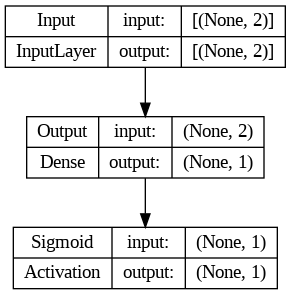

In [14]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [15]:
batch_size = 4
epochs = 250

In [16]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 1s 681ms/step - loss: 0.7929 - Accuracy: 0.5000
Epoch 2/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6993 - Accuracy: 0.5000
Epoch 3/250
1/1 [==============================] - 0s 15ms/step - loss: 0.6320 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 0.5844 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5504 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 0.5258 - Accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - 0s 12ms/step - loss: 0.5073 - Accuracy: 1.0000
Epoch 8/250
1/1 [==============================] - 0s 8ms/step - loss: 0.4930 - Accuracy: 1.0000
Epoch 9/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4813 - Accuracy: 1.0000
Epoch 10/250
1/1 [==============================] - 0s 11ms/step - loss: 0.4715 - Accuracy: 1.0000
Epoch 11/250
1/1 [====

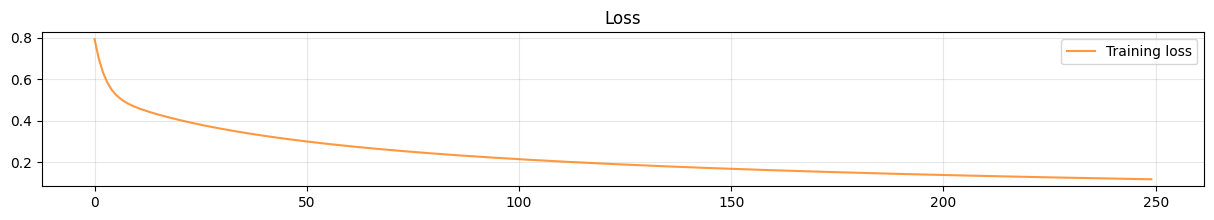

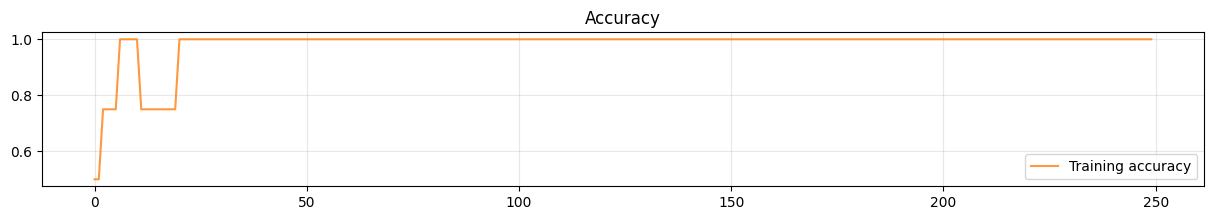

In [17]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

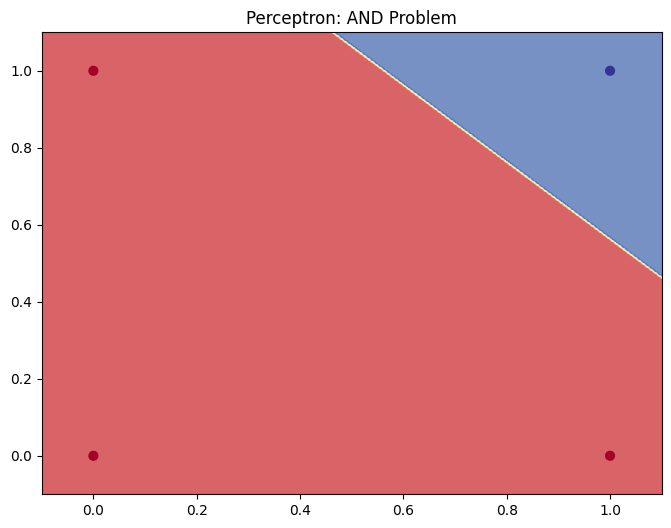

In [18]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: AND Problem')
plt.show()

### OR Problem

In [19]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[1],[1],[1]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

Dataset
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Dataset shape
 (4, 2)

Labels
 [[0]
 [1]
 [1]
 [1]]
Labels shape
 (4, 1)


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


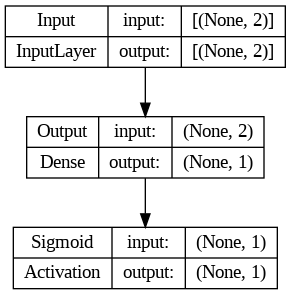

In [20]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [21]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 0s 321ms/step - loss: 0.4704 - Accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 0.4444 - Accuracy: 0.7500
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 0.4243 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 13ms/step - loss: 0.4082 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 15ms/step - loss: 0.3950 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 13ms/step - loss: 0.3839 - Accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - 0s 11ms/step - loss: 0.3743 - Accuracy: 0.7500
Epoch 8/250
1/1 [==============================] - 0s 12ms/step - loss: 0.3659 - Accuracy: 0.7500
Epoch 9/250
1/1 [==============================] - 0s 14ms/step - loss: 0.3583 - Accuracy: 0.7500
Epoch 10/250
1/1 [==============================] - 0s 11ms/step - loss: 0.3515 - Accuracy: 0.7500
Epoch 11/250
1/1 [=

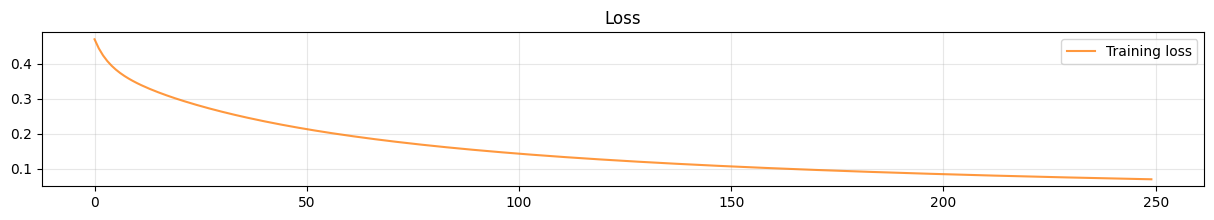

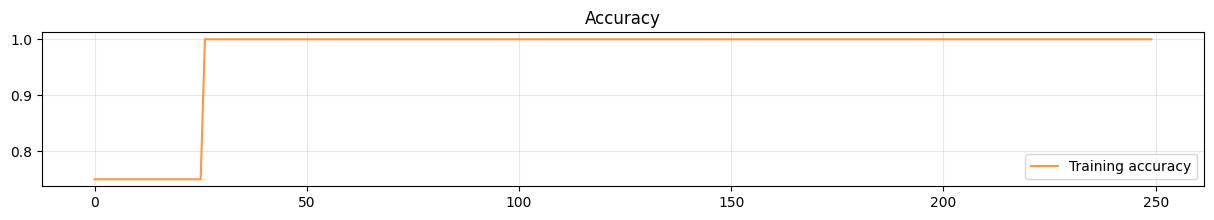

In [22]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

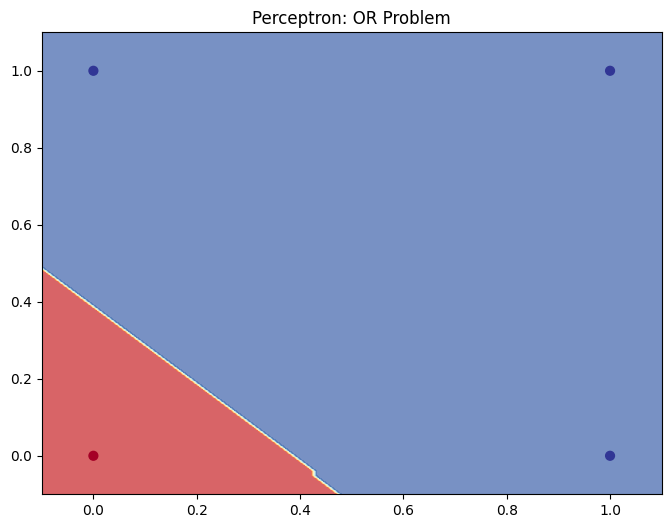

In [23]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: OR Problem')
plt.show()

### XOR Problem

In [24]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])
input_shape = X.shape[1:]
print('Dataset\n', X)
print('Dataset shape\n', X.shape)

y = np.array([[0],[1],[1],[0]])
print('\nLabels\n', y)
print('Labels shape\n', y.shape)

Dataset
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Dataset shape
 (4, 2)

Labels
 [[0]
 [1]
 [1]
 [0]]
Labels shape
 (4, 1)


Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Output (Dense)              (None, 1)                 3         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 3 (12.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


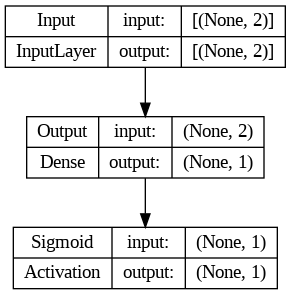

In [25]:
perceptron = build_perceptron(input_shape)
perceptron.summary()
tfk.utils.plot_model(perceptron, show_shapes=True, expand_nested=True)

In [26]:
history = perceptron.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 0s 330ms/step - loss: 0.7463 - Accuracy: 0.5000
Epoch 2/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7346 - Accuracy: 0.5000
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7264 - Accuracy: 0.5000
Epoch 4/250
1/1 [==============================] - 0s 11ms/step - loss: 0.7206 - Accuracy: 0.5000
Epoch 5/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7164 - Accuracy: 0.5000
Epoch 6/250
1/1 [==============================] - 0s 13ms/step - loss: 0.7133 - Accuracy: 0.5000
Epoch 7/250
1/1 [==============================] - 0s 9ms/step - loss: 0.7110 - Accuracy: 0.5000
Epoch 8/250
1/1 [==============================] - 0s 12ms/step - loss: 0.7093 - Accuracy: 0.5000
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 0.7079 - Accuracy: 0.5000
Epoch 10/250
1/1 [==============================] - 0s 8ms/step - loss: 0.7067 - Accuracy: 0.5000
Epoch 11/250
1/1 [===

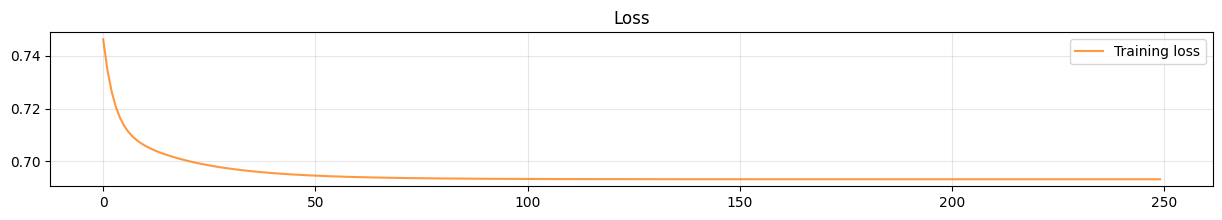

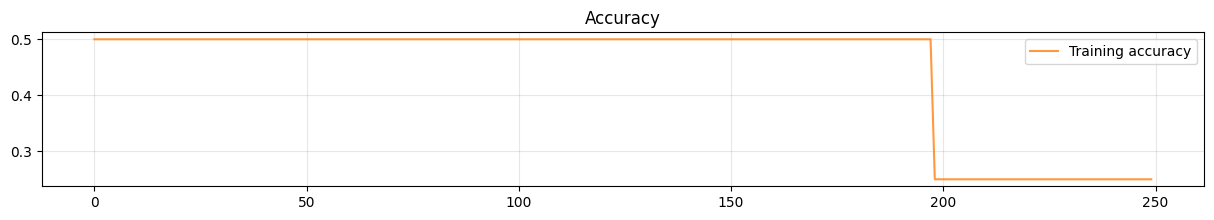

In [27]:
plt.figure(figsize=(15,2))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.title('Loss')
plt.legend()
plt.grid(alpha=.3)

plt.figure(figsize=(15,2))
plt.plot(history['Accuracy'], label='Training accuracy', alpha=.8, color='#ff7f0e')
plt.title('Accuracy')
plt.legend()
plt.grid(alpha=.3)
plt.show()

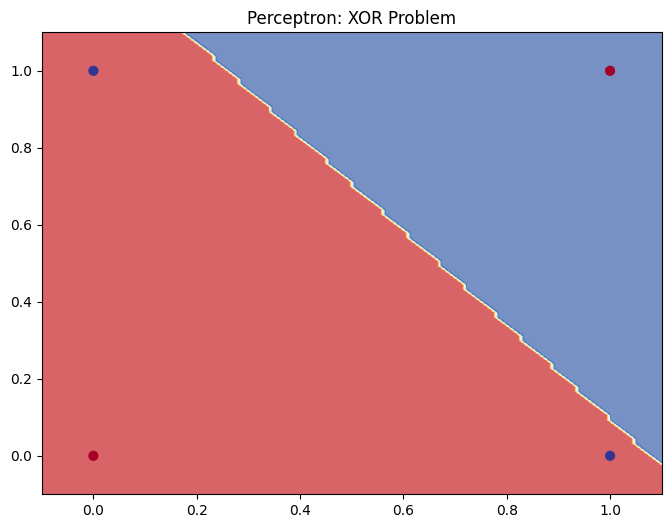

In [28]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = perceptron.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Perceptron: XOR Problem')
plt.show()

### Define the Multilayer Perceptron model

In [29]:
def build_mlp(
    input_shape,
    seed=seed
):
    # Fix randomness
    tf.random.set_seed(seed)

    # Build the model
    input_layer = tfkl.Input(shape=input_shape, name='Input')

    hidden_layer = tfkl.Dense(units=4, name='Hidden')(input_layer)
    hidden_activation = tfkl.Activation('relu', name='ReLU')(hidden_layer)

    output_layer = tfkl.Dense(units=1, name='Output')(hidden_activation)
    output_activation = tfkl.Activation('sigmoid', name='Sigmoid')(output_layer)

    # Connect input and output through the Model class
    model = tfk.Model(inputs=input_layer, outputs=output_activation, name='MLP')

    # Compile the model
    loss = tfk.losses.BinaryCrossentropy()
    learning_rate = 0.5
    optimizer = tfk.optimizers.SGD(learning_rate)
    metrics = ['Accuracy']
    model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

    # Return the model
    return model

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input (InputLayer)          [(None, 2)]               0         
                                                                 
 Hidden (Dense)              (None, 4)                 12        
                                                                 
 ReLU (Activation)           (None, 4)                 0         
                                                                 
 Output (Dense)              (None, 1)                 5         
                                                                 
 Sigmoid (Activation)        (None, 1)                 0         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


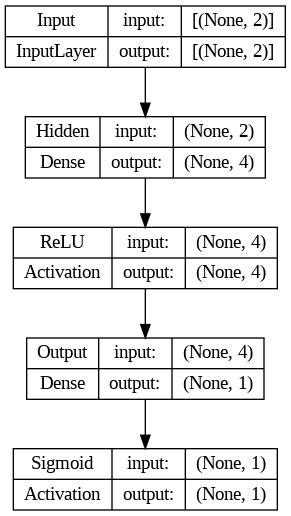

In [30]:
mlp = build_mlp(input_shape)
mlp.summary()
tfk.utils.plot_model(mlp, show_shapes=True, expand_nested=True)

In [31]:
history = mlp.fit(
    x = X,
    y = y,
    batch_size = batch_size,
    epochs = epochs
).history

Epoch 1/250
1/1 [==============================] - 0s 427ms/step - loss: 0.7012 - Accuracy: 0.7500
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 0.6917 - Accuracy: 0.5000
Epoch 3/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6792 - Accuracy: 0.7500
Epoch 4/250
1/1 [==============================] - 0s 10ms/step - loss: 0.6637 - Accuracy: 0.7500
Epoch 5/250
1/1 [==============================] - 0s 12ms/step - loss: 0.6500 - Accuracy: 0.7500
Epoch 6/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6372 - Accuracy: 0.7500
Epoch 7/250
1/1 [==============================] - 0s 13ms/step - loss: 0.6225 - Accuracy: 1.0000
Epoch 8/250
1/1 [==============================] - 0s 11ms/step - loss: 0.6079 - Accuracy: 1.0000
Epoch 9/250
1/1 [==============================] - 0s 10ms/step - loss: 0.5930 - Accuracy: 1.0000
Epoch 10/250
1/1 [==============================] - 0s 11ms/step - loss: 0.5781 - Accuracy: 1.0000
Epoch 11/250
1/1 [=

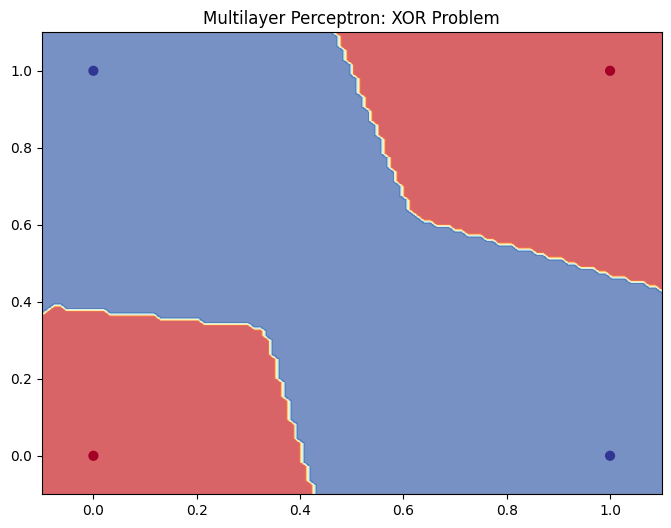

In [32]:
xx, yy = np.meshgrid(
    np.linspace(-0.1,1.1,100),
    np.linspace(-0.1,1.1,100)
)
x_in = np.c_[xx.ravel(), yy.ravel()]
y_pred = mlp.predict(x_in, verbose=0)
y_pred = np.round(y_pred).reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
plt.scatter(X[:,0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.title('Multilayer Perceptron: XOR Problem')
plt.show()

In [ ]:
!git status

*Credits: Eugenio Lomurno, 📧 eugenio.lomurno@polimi.it*